#### [ 조현병 정신질환 시각화 - Matplotlib ]
- 데이터 셋 : 2018~2022년까지 시도별 연령별 성별 조현병 환자 수
- 과정
    * 데이터파일 확인
        - 첫 번째 줄이 컬럼명이 맞는지 확인         V
        - 불필요한 컬럼이나 행이 있는지 확인        V
        - 결측치 정도 확인                        V 
    * 데이터 전처리
        - 파일 확인 후 체크한 사항 진행            V
        - 결측치 처리                             V
        - 이상치 처리                             V
        - 중복데이터 처리                         V
        - 행인덱스에 대한 처리                    V
        - 형변환 => 실제데이터와 타입 일치         V
    * 데이터 가공 : 분석하고자하는 데이터 형태
        - 행인덱스 처리 : 멀티인덱스/컬럼 => 행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 ==> 연속형 -> 범주형 or 범주형 -> 연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 아아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

In [168]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Utils import def_util as util
import seaborn as sns 

In [169]:
util.font_add('malgun')

In [170]:
# [2] 데이터 준비
fileName = r'20240724\work_박형준\시군구 성별 연령별 주요 정실질환 통계 2018~2022.csv'

In [171]:
# [3] CSV ==> DATAFRAME
dataDF = pd.read_csv(fileName)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   진료년도    165000 non-null  int64 
 1   상별구분    165000 non-null  object
 2   시도      165000 non-null  object
 3   시군구     165000 non-null  object
 4   성별      165000 non-null  object
 5   연령구분    165000 non-null  object
 6   환자수     165000 non-null  int64 
 7   입내원일수   165000 non-null  int64 
 8   요양급여비용  165000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 11.3+ MB


In [172]:
dataDF.head()

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080


In [173]:
dataDF.isna().sum()

진료년도      0
상별구분      0
시도        0
시군구       0
성별        0
연령구분      0
환자수       0
입내원일수     0
요양급여비용    0
dtype: int64

In [174]:
dataDF[dataDF.columns[:6]].duplicated().sum()

0

In [175]:
dataDF

,진료년도,상별구분,시도,시군구,성별,연령구분,환자수,입내원일수,요양급여비용
0,2018,ADHD,서울,강남구,남,0~9세,437,3330,188836790
1,2018,ADHD,서울,강남구,남,10~19세,1111,8869,563498480
2,2018,ADHD,서울,강남구,남,20~29세,456,3485,213248290
3,2018,ADHD,서울,강남구,남,30~39세,174,1357,72761750
4,2018,ADHD,서울,강남구,남,40~49세,55,357,21611080
...,...,...,...,...,...,...,...,...,...
164995,2022,조현병,세종,세종시,여,60~69세,29,597,40381390
164996,2022,조현병,세종,세종시,여,70~79세,13,550,39400730
164997,2022,조현병,세종,세종시,여,80~89세,0,0,0
164998,2022,조현병,세종,세종시,여,90~99세,0,0,0


In [176]:
dataDF2 = dataDF[dataDF['상별구분'] == '조현병']
ageSR = dataDF2['연령구분']

In [177]:
ageSR[(ageSR == '0~9세') | (ageSR == '10~19세')] = '0~19세'
ageSR[(ageSR == '100세 이상') | (ageSR == '90~99세') | (ageSR == '80~89세')] = '80세 이상'
dataDF2['연령구분'] = ageSR
dataDF2 = dataDF2.groupby(['연령구분','성별']).sum()

C:\Users\KDP-38\AppData\Local\Temp\ipykernel_14976\555531014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageSR[(ageSR == '0~9세') | (ageSR == '10~19세')] = '0~19세'
C:\Users\KDP-38\AppData\Local\Temp\ipykernel_14976\555531014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ageSR[(ageSR == '0~9세') | (ageSR == '10~19세')] = '0~19세'
C:\Users\KDP-38\AppData\Local\Temp\ipykernel_14976\555531014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [178]:
agePatient = dataDF2[dataDF2.columns[5]]
agePatient

연령구분    성별
0~19세   남       87073
        여       74329
20~29세  남     1206841
        여      964764
30~39세  남     1737766
        여     1547064
40~49세  남     2536471
        여     2106819
50~59세  남     2720693
        여     2732605
60~69세  남     1875165
        여     2314483
70~79세  남      553980
        여      865605
80세 이상  남       17852
        여      113644
Name: 입내원일수, dtype: int64

In [192]:
ageIdx = agePatient.index.levels[0].to_list()
genderPatientDict={
    '남' : agePatient[:,'남'].to_list(),
    '여' : agePatient[:,'여'].to_list()
}
print(genderPatientDict)

{'남': [87073, 1206841, 1737766, 2536471, 2720693, 1875165, 553980, 17852], '여': [74329, 964764, 1547064, 2106819, 2732605, 2314483, 865605, 113644]}


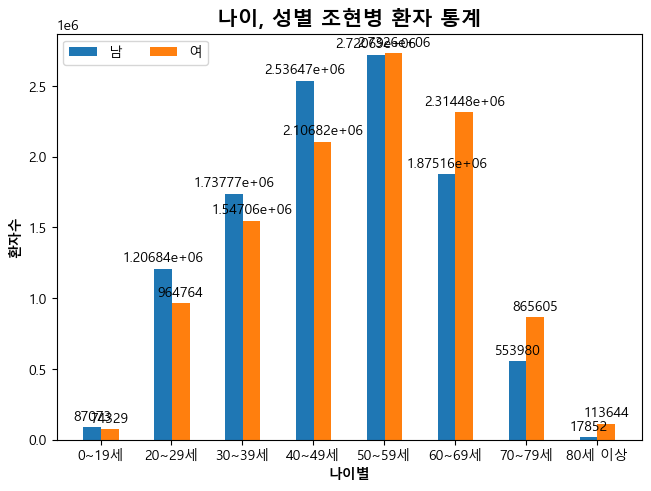

In [180]:
x = np.arange(len(ageIdx))

width = 0.25
multiplier = 0 
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in genderPatientDict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('환자수', fontweight='bold')
ax.set_xlabel('나이별', fontweight='bold')
ax.set_title('나이, 성별 조현병 환자 통계', fontweight='bold', fontsize=15)
ax.set_xticks(x + width-0.13, ageIdx)
ax.legend(loc='upper left', ncols=3)

plt.show()

In [181]:
ageSR2 = ageSR.str.slice(start=0,stop=1)
ageSR2 = ageSR2.astype('int16')
ageDF2 = pd.DataFrame(data={
                     '환자수' : dataDF[dataDF['상별구분'] == '조현병']['환자수'].tolist(),
                     '연령구분' :ageSR2.to_list()})
ageDF2.corr()

,환자수,연령구분
환자수,1.000000,-0.083164
연령구분,-0.083164,1.000000


In [182]:
ageGroup = ageDF2.groupby('연령구분').sum()
ageGroup

,환자수
연령구분,
0,9316
2,93303
3,135999
4,166305
5,153108
6,92099
7,32837
8,7833


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


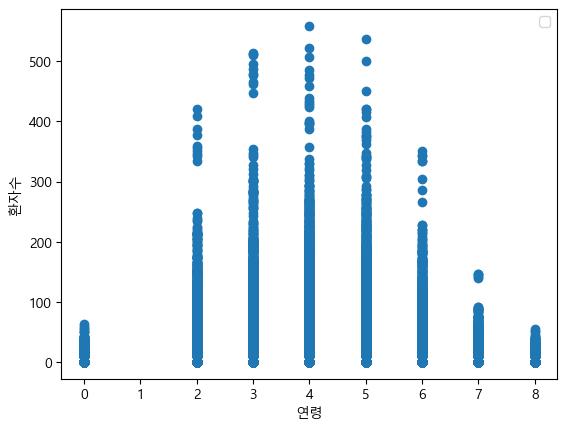

In [183]:
area = ageDF2['환자수']
plt.scatter(ageDF2['연령구분'],ageDF2['환자수'])
plt.xlabel('연령')
plt.ylabel('환자수')
plt.legend()
plt.show()

In [193]:
yearData = dataDF.groupby(['상별구분','진료년도']).sum()['환자수']
byungIdx = yearData.index.levels[0].to_list()
yearIdx = yearData.index.levels[1].to_list()
yearDataDict = {}
for idx in byungIdx:
    yearDataDict[idx] = yearData.loc[idx].to_list()
yearDataDict

{'ADHD': [63501, 78230, 86969, 113285, 160789],
 '불면증': [643333, 682383, 704659, 741920, 777201],
 '불안장애': [740353, 771898, 798633, 886414, 935127],
 '우울증': [826611, 877412, 912375, 1003855, 1099954],
 '조울증': [104154, 115756, 122334, 132906, 145164],
 '조현병': [138314, 138750, 137062, 138303, 138371]}

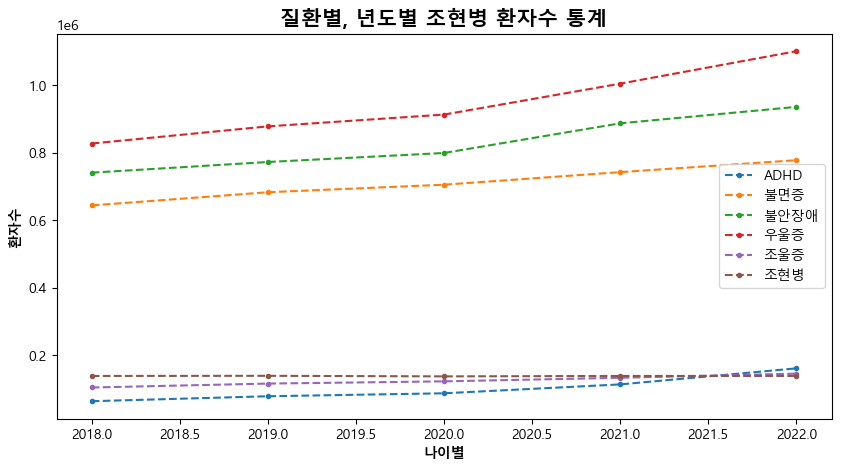

In [194]:
plt.figure(figsize=(10,5))
for key,val in yearDataDict.items():
    plt.plot(yearIdx, val, '--.',label=key)
plt.ylabel('환자수', fontweight='bold')
plt.xlabel('나이별', fontweight='bold')
plt.title('질환별, 년도별 조현병 환자수 통계', fontweight='bold', fontsize=15)
plt.legend()
plt.show()

In [186]:
placeDF = dataDF[['진료년도','상별구분','요양급여비용','입내원일수','환자수']].groupby('상별구분').sum()

In [187]:
placeDF['환자별비용'] = placeDF['요양급여비용'] / placeDF['환자수']
placeDF['환자별비용'] = placeDF['환자별비용'].fillna(0)
placeDF['환자별비용'] = placeDF['환자별비용'].astype('int32')
placeDF['병별입원율'] = round(placeDF['입내원일수'] / placeDF['환자수'],2)
byungibDictList = [placeDF['병별입원율'].to_dict(),placeDF['환자별비용'].to_dict()]

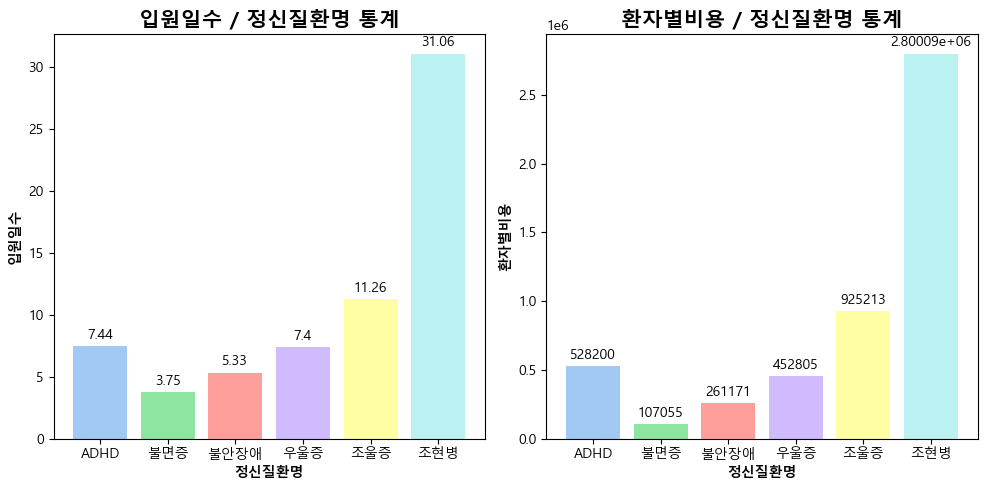

In [188]:
axes = plt.subplots(1,2, figsize=(10,5))
colors = sns.color_palette('pastel6',6)
lists = ['입원일수','환자별비용']
for idx, byungibDict in enumerate(byungibDictList):
    rects = axes[1][idx].bar(byungibDict.keys(), byungibDict.values(), color = colors)
    axes[1][idx].bar_label(rects, padding=3)
    axes[1][idx].set_ylabel(lists[idx], fontweight='bold')
    axes[1][idx].set_xlabel('정신질환명', fontweight='bold')
    axes[1][idx].set_title(f'{lists[idx]} / 정신질환명 통계', fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

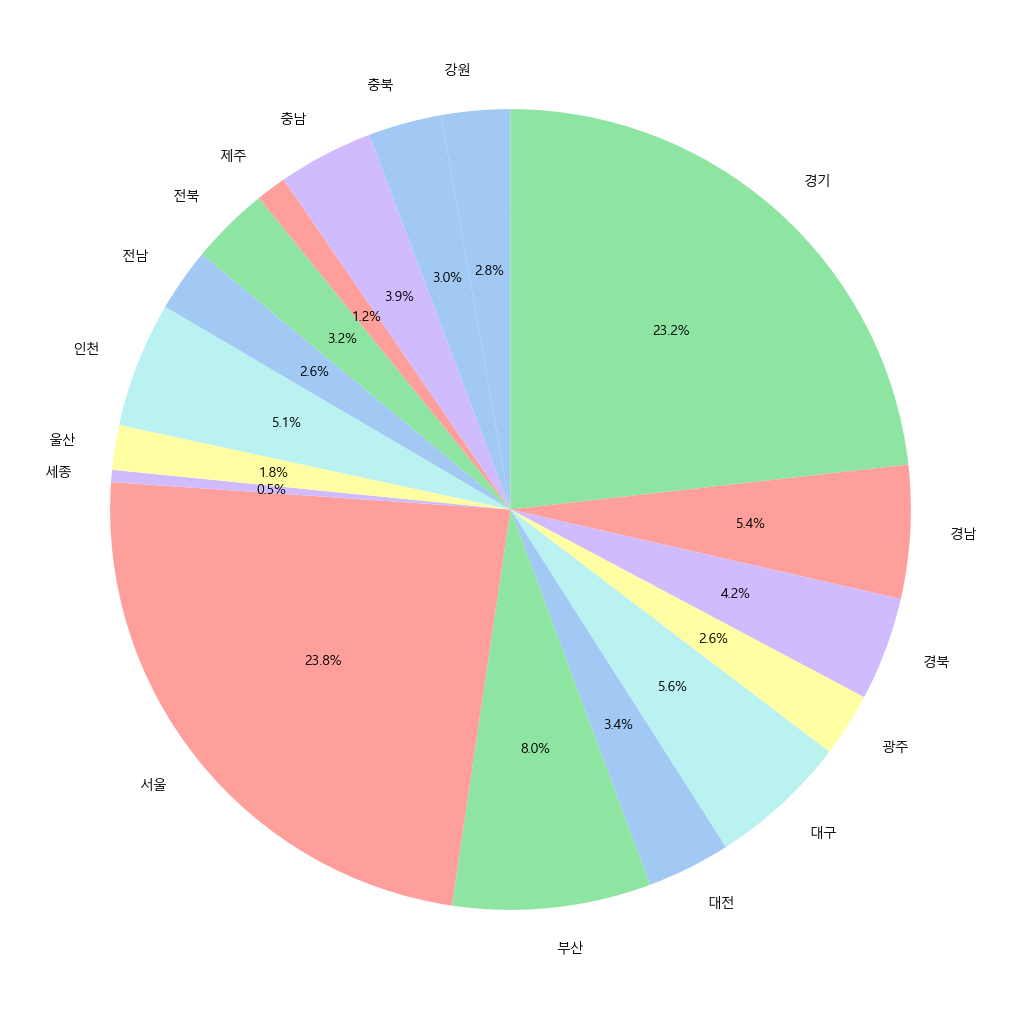

In [189]:
placeDF = dataDF[['시도','환자수']].groupby('시도').sum()
idx = placeDF.index.to_list()
val = placeDF['환자수'].to_list()
colors = sns.color_palette('pastel6',16)
plt.figure(figsize=(13,13))
plt.pie(val,labels=idx, autopct='%.1f%%',colors=colors,
        counterclock=False, startangle=100)

plt.show()